In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     # visualization libaray
import seaborn as sns       # visualization libaray
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
%matplotlib inline

In [66]:
ds = pd.read_csv("C:\\Users\\himan\\OneDrive\\Desktop\\Csv model\\NEET_2024_RESULTS.csv")

In [3]:
# Display the first few rows of the dataset
ds.head()

,dummy_srlno,marks,state,city,center_name,center_number
0,1101010001,46,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
1,1101010002,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
2,1101010003,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
3,1101010004,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
4,1101010005,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101


In [5]:
ds.tail()

,dummy_srlno,marks,state,city,center_name,center_number
2333115,4613120135,279,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333116,4613120136,102,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333117,4613120137,14,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333118,4613120138,179,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333119,4613120139,91,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312


In [6]:
# Check for shape in data set
ds.shape

(2333120, 6)

In [7]:
# Display basic statistics summary
ds.describe()

,dummy_srlno,marks,center_number
count,2.333120e+06,2.333120e+06,2.333120e+06
mean,3.224024e+09,2.171572e+02,3.224023e+05
std,1.049597e+09,1.662403e+02,1.049597e+05
min,1.101010e+09,-1.800000e+02,1.101010e+05
25%,2.602020e+09,8.700000e+01,2.602020e+05
50%,3.111190e+09,1.630000e+02,3.111190e+05
75%,4.122060e+09,3.130000e+02,4.122060e+05
max,9.914010e+09,7.200000e+02,9.914010e+05


- count: Number of entries in each column.(2,333,120)
- mean: Average value.(217.1572)
- std: Standard deviation, a measure of the amount of variation or dispersion of the values.(166.2403)
- min: Minimum value.(-180)
- 25%: 25th percentile (first quartile).(87)
- 50%: Median value (second quartile or 50th percentile).(163)
- 75%: 75th percentile (third quartile).(313)
- max: Maximum value.(720)

In [9]:
# Check the type for every feature
ds.dtypes

dummy_srlno       int64
marks             int64
state            object
city             object
center_name      object
center_number     int64
dtype: object

C:\Users\himan\OneDrive\Documents\Custom Office Templates\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


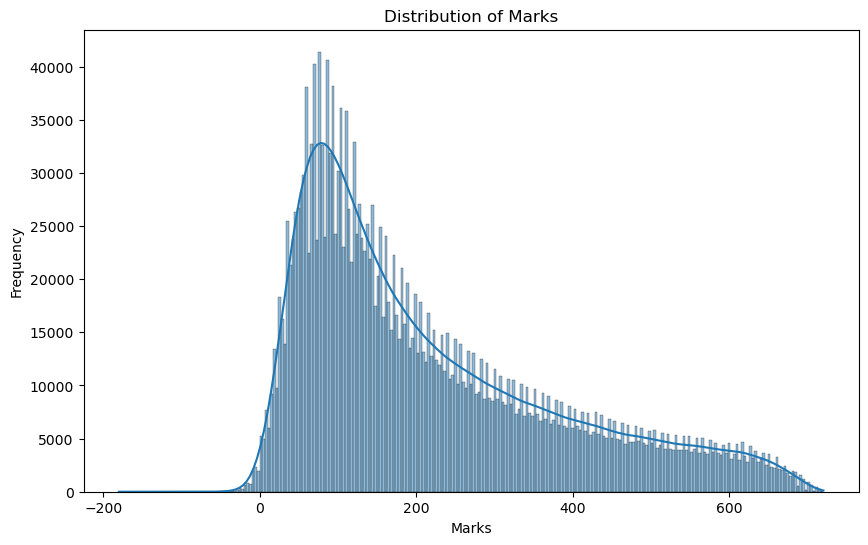

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(ds['marks'], kde=True)
plt.title('Distribution of Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.show()

In [11]:
ds["marks"].skew(),ds["marks"].kurtosis()

(0.9830150500194315, 0.0549220930092158)

In [12]:
ds.marks.mean() , ds.marks.median()

(217.15717965642574, 163.0)

## Graph Interpretation:
- Distribution Shape:
   - The histogram shows the distribution of students' marks, providing an idea of how marks are spread across the dataset.
   - The KDE (Kernel Density Estimate) line smooths out the distribution, offering a continuous view of the data density.
- Central Tendency:
   - The peak of the histogram and the KDE curve indicates the most common range of marks obtained by students.
   - If the peak is towards the higher end, it suggests that many students scored high marks.
- Spread and Variability:

   - The width of the histogram and the spread of the KDE curve indicate the variability in marks.
   - A wider spread suggests that marks are widely dispersed, whereas a narrower spread suggests that most students scored within a close range.
- Skewness:

   - If the histogram is skewed to the right or left, it indicates that the distribution of marks is not symmetric.
   - A right skew (positive skew) means there are more students with lower marks and a few with very high marks.
   - A left skew (negative skew) means there are more students with higher marks and a few with very low marks.

- Outliers:

   - The tails of the distribution can help identify outliers or extreme values in the dataset.
   - If there are long tails on either side, it suggests the presence of outliers or less common mark ranges.
- Overall Performance:

   - The area under the curve of the KDE represents the total number of students.
   - By observing the distribution, we can infer whether the overall performance of students was clustered around certain mark ranges or spread out.

<Axes: xlabel='marks', ylabel='state'>

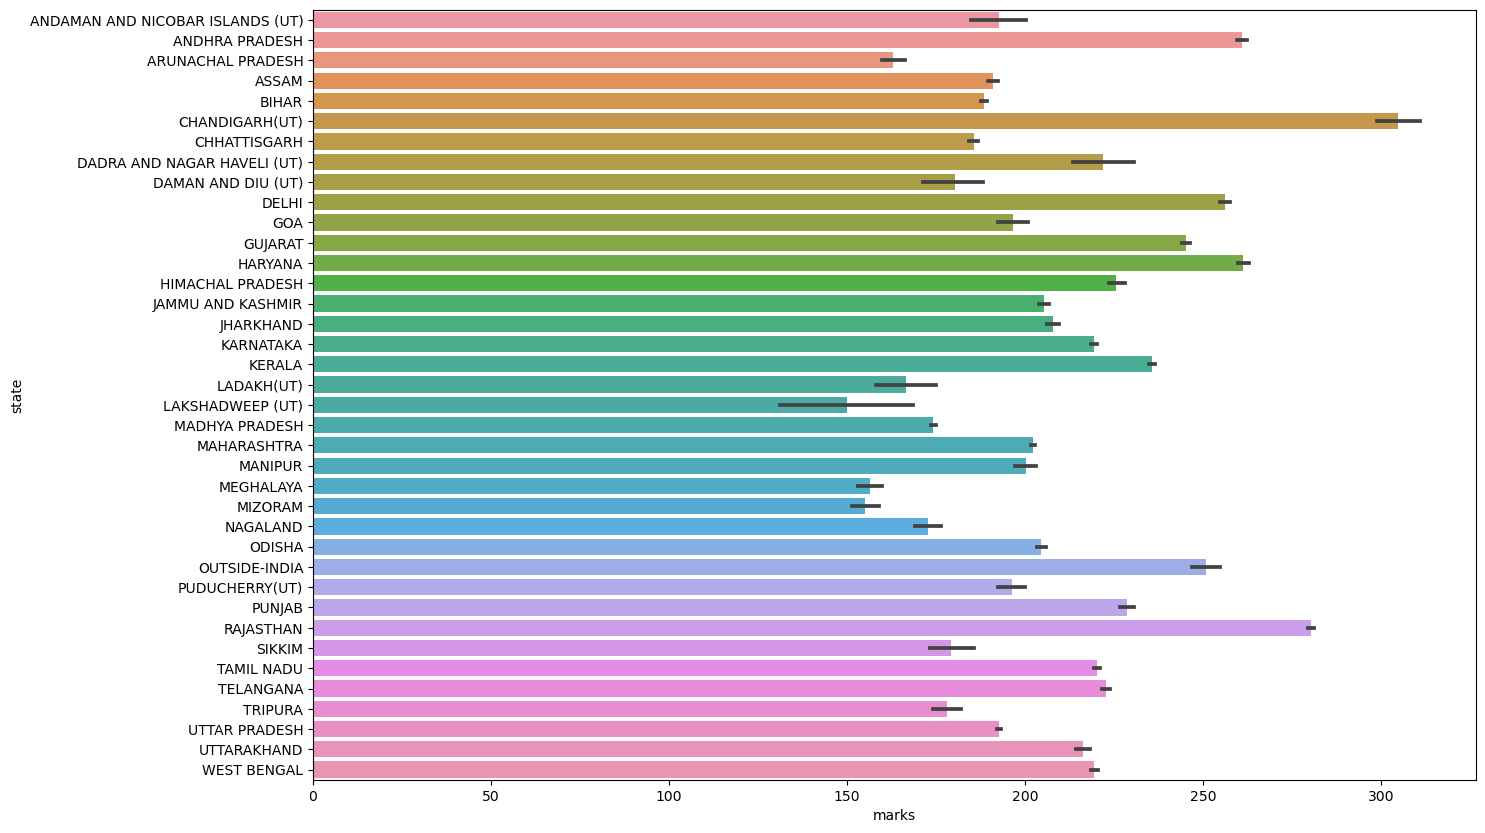

In [13]:
plt.figure(figsize=(15, 10))
sns.barplot(data = ds ,x = "marks",y = "state")

#Distribution of Marks by State

In [14]:
# Finding the highest marks in each state
state_max_marks = ds.groupby('state')['marks'].max().reset_index()

# Merging with the original DataFrame to find the toppers 
state_toppers = pd.merge(ds, state_max_marks, on=['state', 'marks'])
print(state_toppers)

# Counting the number of toppers in each state
state_toppers_count = state_toppers['state'].value_counts().reset_index()
state_toppers_count.columns = ['state', 'count']

     dummy_srlno  marks                             state         city  \
0     1101010056    680  ANDAMAN AND NICOBAR ISLANDS (UT)   PORT BLAIR   
1     1203040201    720                    ANDHRA PRADESH      NELLORE   
2     1205011150    720                    ANDHRA PRADESH   VIJAYAWADA   
3     1205030130    720                    ANDHRA PRADESH   VIJAYAWADA   
4     1205040383    720                    ANDHRA PRADESH   VIJAYAWADA   
..           ...    ...                               ...          ...   
104   4408010959    720                     UTTAR PRADESH      LUCKNOW   
105   4502010321    720                       UTTARAKHAND     HALDWANI   
106   4608060485    720                       WEST BENGAL      KOLKATA   
107   4615020497    720                       WEST BENGAL  MURSHIDABAD   
108   4609020058    720                       WEST BENGAL     SILIGURI   

                                           center_name  center_number  
0                             KENDRIYA 

In [15]:
# Counting the number of toppers in each state
center_toppers_count = state_toppers['center_name'].value_counts().reset_index()
center_toppers_count.columns = ['center_name', 'count']
center_toppers_count

,center_name,count
0,S.D.S.N. MAHAVIDYALAYA,2
1,SHREE NARAYANA CENTRAL SCHOOL,2
2,ABU DHABI INDIAN SCHOOL,2
3,SMT. KASTURBA NIMCHAND SHAH P. MUTHYALU CHETTY...,2
4,KENDRIYA VIDYALAYA NO. 1,1
...,...,...
100,PLACID VIDYA VIHAR SR.SEC.SCHOOL,1
101,STRATFORD PUBLIC SCHOOL KALEEIL NAGAR,1
102,SHRI DHARMASTHALA MANJUNATHESHWARA SCHOOL,1
103,NAGARJUNA VIDYANIKETAN,1


In [16]:
Topper_state = state_toppers_count.head(10) 
Topper_state

,state,count
0,RAJASTHAN,13
1,ODISHA,12
2,MADHYA PRADESH,8
3,TAMIL NADU,8
4,MAHARASHTRA,7
5,GUJARAT,4
6,BIHAR,4
7,ANDHRA PRADESH,4
8,KERALA,4
9,PUNJAB,4


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'RAJASTHAN'),
  Text(1, 0, 'ODISHA'),
  Text(2, 0, 'MADHYA PRADESH'),
  Text(3, 0, 'TAMIL NADU'),
  Text(4, 0, 'MAHARASHTRA'),
  Text(5, 0, 'GUJARAT'),
  Text(6, 0, 'BIHAR'),
  Text(7, 0, 'ANDHRA PRADESH'),
  Text(8, 0, 'KERALA'),
  Text(9, 0, 'PUNJAB')])

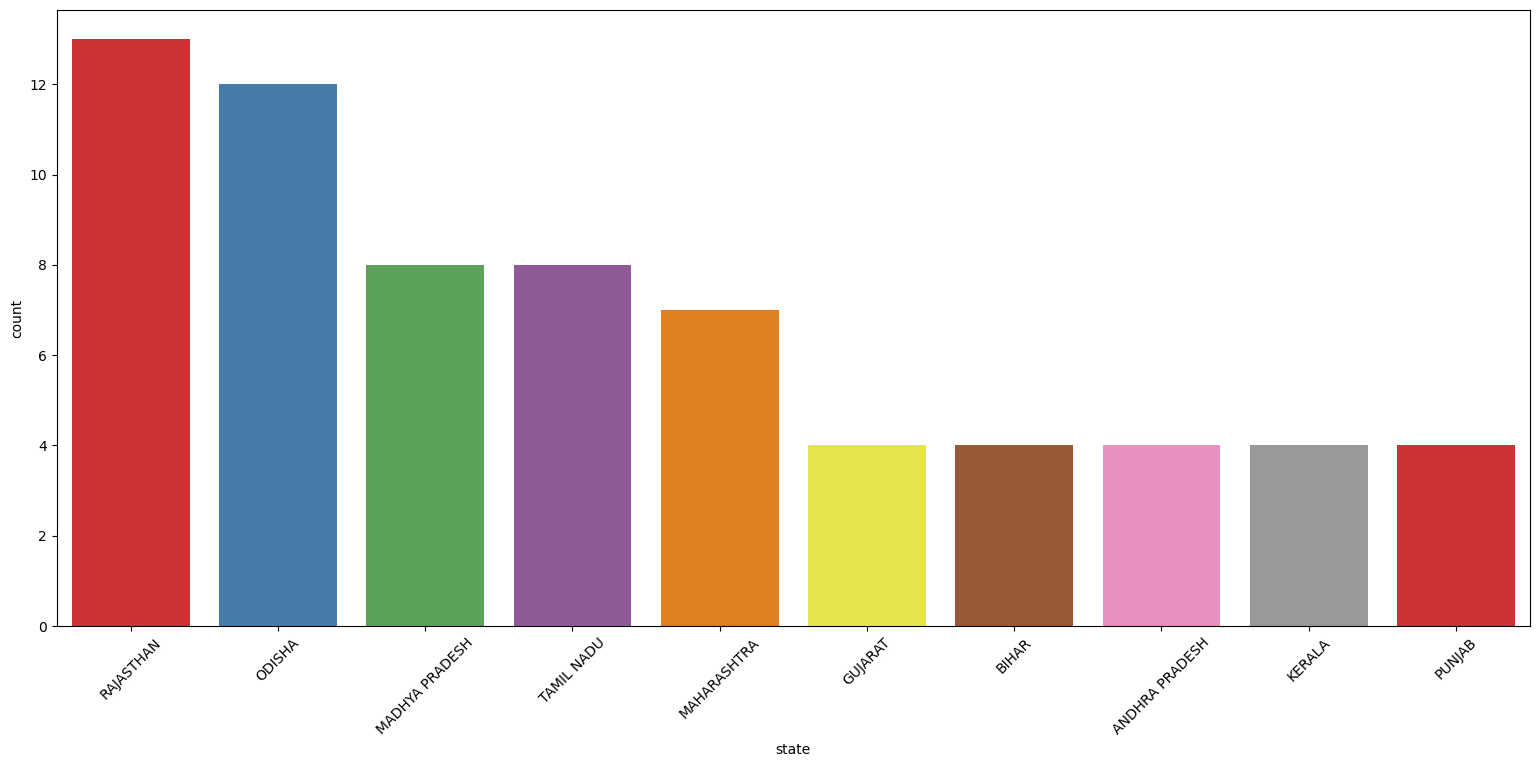

In [17]:
plt.figure(figsize = (19,8))
sns.barplot(x= 'state', y= 'count', data=Topper_state, palette='Set1')
plt.xticks(rotation=45)

#Distribution of marks city wise of rajasthan

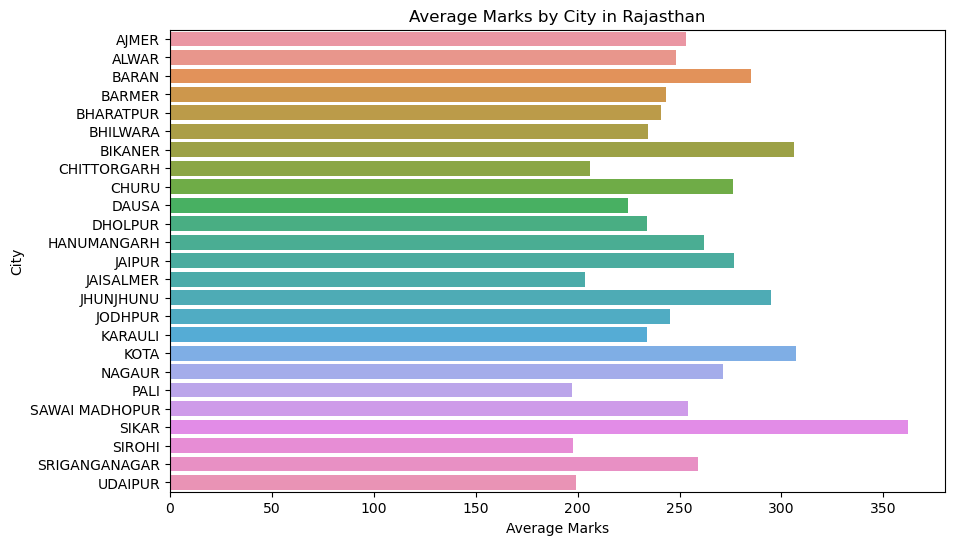

In [20]:
# Filter the dataset for Rajasthan
rajasthan_df = ds[ds['state'] == 'RAJASTHAN']


# Calculate average marks by city
city_avg_marks = rajasthan_df.groupby('city')['marks'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=city_avg_marks, x='marks', y='city')
plt.title("Average Marks by City in Rajasthan")
plt.xlabel("Average Marks")
plt.ylabel("City")
plt.show()

- This bar graph displaying the average marks for each city in Rajasthan. If you have a larger dataset, this approach will give you a clear visualization of marks across all cities within the state.

In [48]:
# Filter the dataset for Rajasthan state
rajasthan_df = ds[ds['state'] == 'RAJASTHAN']

# Display the filtered data
print(rajasthan_df)

         dummy_srlno  marks      state           city  \
1429920   3901010001    185  RAJASTHAN          AJMER   
1429921   3901010002     64  RAJASTHAN          AJMER   
1429922   3901010003     49  RAJASTHAN          AJMER   
1429923   3901010004    136  RAJASTHAN          AJMER   
1429924   3901010005    377  RAJASTHAN          AJMER   
...              ...    ...        ...            ...   
1623044   3925040249    507  RAJASTHAN  SRIGANGANAGAR   
1623045   3925040250     76  RAJASTHAN  SRIGANGANAGAR   
1623046   3925040251    121  RAJASTHAN  SRIGANGANAGAR   
1623047   3925040252    247  RAJASTHAN  SRIGANGANAGAR   
1623048   3925040253    108  RAJASTHAN  SRIGANGANAGAR   

                            center_name  center_number  
1429920  MAHARAJA AGRASEN PUBLIC SCHOOL         390101  
1429921  MAHARAJA AGRASEN PUBLIC SCHOOL         390101  
1429922  MAHARAJA AGRASEN PUBLIC SCHOOL         390101  
1429923  MAHARAJA AGRASEN PUBLIC SCHOOL         390101  
1429924  MAHARAJA AGRASEN PUBL

In [49]:
# Group by city
city_wise_data = rajasthan_df.groupby('city').agg(
    total_students=('dummy_srlno', 'count'),
    avg_marks=('marks', 'mean'),
    max_marks=('marks', 'max'),
    min_marks=('marks', 'min')
    
).reset_index()

# Display the city-wise grouped data
print(city_wise_data)

              city  total_students   avg_marks  max_marks  min_marks
0            AJMER            5752  253.201321        715        -36
1            ALWAR            7861  248.271340        715        -24
2            BARAN            2845  285.046046        715        -14
3           BARMER            2590  243.133205        700        -10
4        BHARATPUR            3290  240.731611        707        -32
5         BHILWARA            2164  234.509704        710        -14
6          BIKANER            5923  305.932804        716        -11
7      CHITTORGARH            1507  206.195753        715        -20
8            CHURU            2763  276.410423        706        -15
9            DAUSA            3252  224.496617        705        -29
10         DHOLPUR            1694  233.848288        707        -24
11     HANUMANGARH            1844  262.146963        715         -7
12          JAIPUR           55124  276.600664        720       -135
13       JAISALMER             316

<Axes: >

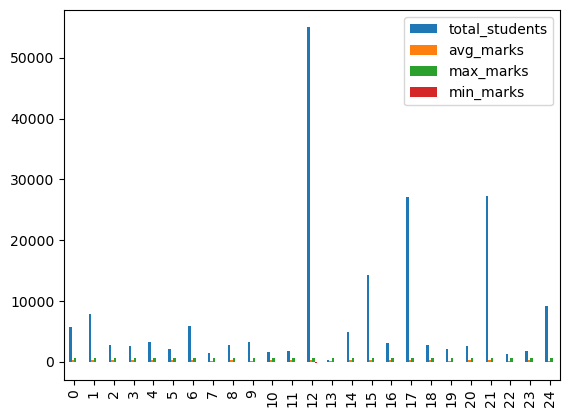

In [50]:
city_wise_data.plot(kind="bar")

In [51]:
# Filter the dataset for Chandigarh state
chandigarh_df = ds[ds['state'] == 'CHANDIGARH(UT)']

# Display the filtered data
print(chandigarh_df)

        dummy_srlno  marks           state               city  \
250104   1601010001    335  CHANDIGARH(UT)  CHANDIGARH/MOHALI   
250105   1601010002    229  CHANDIGARH(UT)  CHANDIGARH/MOHALI   
250106   1601010003     45  CHANDIGARH(UT)  CHANDIGARH/MOHALI   
250107   1601010004    327  CHANDIGARH(UT)  CHANDIGARH/MOHALI   
250108   1601010005    372  CHANDIGARH(UT)  CHANDIGARH/MOHALI   
...             ...    ...             ...                ...   
253629   1601040477    113  CHANDIGARH(UT)  CHANDIGARH/MOHALI   
253630   1601040478    270  CHANDIGARH(UT)  CHANDIGARH/MOHALI   
253631   1601040479    101  CHANDIGARH(UT)  CHANDIGARH/MOHALI   
253632   1601040480    122  CHANDIGARH(UT)  CHANDIGARH/MOHALI   
253633   1601040481     70  CHANDIGARH(UT)  CHANDIGARH/MOHALI   

                         center_name  center_number  
250104  ST. JOSEPH S SR. SEC. SCHOOL         160101  
250105  ST. JOSEPH S SR. SEC. SCHOOL         160101  
250106  ST. JOSEPH S SR. SEC. SCHOOL         160101  
250

In [52]:
# Group by city
city_wise_data = chandigarh_df.groupby('city').agg(
    total_students=('dummy_srlno', 'count'),
    avg_marks=('marks', 'mean'),
    max_marks=('marks', 'max'),
    min_marks=('marks', 'min')
).reset_index()

# Display the city-wise grouped data
print(city_wise_data)

                city  total_students   avg_marks  max_marks  min_marks
0  CHANDIGARH/MOHALI            3530  304.816714        715          0


<Axes: >

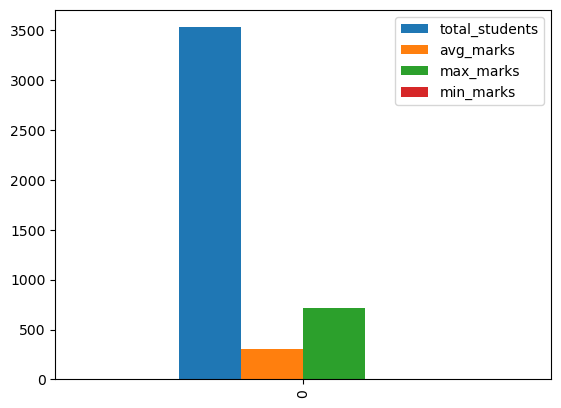

In [53]:
city_wise_data.plot(kind="bar")

In [54]:
# Filter the dataset for Odisha state
Odisha_df = ds[ds['state'] == 'ODISHA']

# Display the filtered data
print(Odisha_df)

         dummy_srlno  marks   state        city  \
1328477   3601010001    111  ODISHA       ANGUL   
1328478   3601010002     70  ODISHA       ANGUL   
1328479   3601010003     40  ODISHA       ANGUL   
1328480   3601010004    236  ODISHA       ANGUL   
1328481   3601010005    232  ODISHA       ANGUL   
...              ...    ...     ...         ...   
1392782   3627010197     75  ODISHA  RAIRANGPUR   
1392783   3627010198     80  ODISHA  RAIRANGPUR   
1392784   3627010199    124  ODISHA  RAIRANGPUR   
1392785   3627010200    139  ODISHA  RAIRANGPUR   
1392786   3627010201     90  ODISHA  RAIRANGPUR   

                                               center_name  center_number  
1328477  NARAYANI INSTITUTE OF ENGINEERING & TECHNOLOGY...         360101  
1328478  NARAYANI INSTITUTE OF ENGINEERING & TECHNOLOGY...         360101  
1328479  NARAYANI INSTITUTE OF ENGINEERING & TECHNOLOGY...         360101  
1328480  NARAYANI INSTITUTE OF ENGINEERING & TECHNOLOGY...         360101  
1328481

In [55]:
# Group by city
city_wise_data = Odisha_df.groupby('city').agg(
    total_students=('dummy_srlno', 'count'),
    avg_marks=('marks', 'mean'),
    max_marks=('marks', 'max'),
    min_marks=('marks', 'min')
).reset_index()

# Display the city-wise grouped data
print(city_wise_data)

                         city  total_students   avg_marks  max_marks  \
0                       ANGUL            1781  177.981471        695   
1                    BALANGIR            2500  214.653200        705   
2         BALASORE (BALESWAR)            4542  169.167768        715   
3                    BARAGARH            1744  214.532110        715   
4          BARIPADA/MAYURBANJ            2337  134.775353        696   
5            BERHAMPUR/GANJAM            5900  233.193559        710   
6                     BHADRAK            2290  171.330568        705   
7    BHAWANIPATNA / KALAHANDI            1369  166.446311        679   
8                 BHUBANESWAR           15653  249.268383        715   
9                     CUTTACK            6436  230.247980        715   
10                  DHENKANAL            1187  192.427127        697   
11              JAGATSINGHPUR            1111  158.418542        686   
12                     JAJPUR            2595  210.520617       

<Axes: >

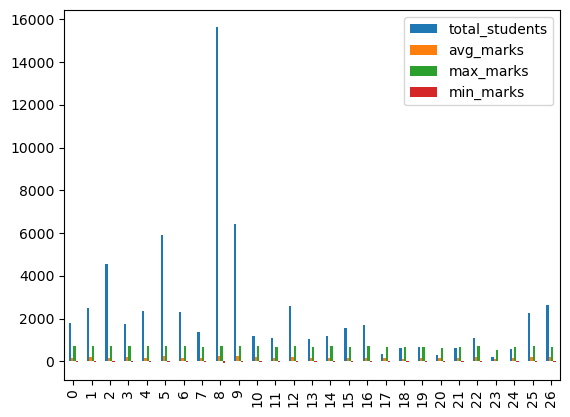

In [56]:
city_wise_data.plot(kind="bar")

In [57]:
# Filter the dataset for Madhya Pardesh state
Madh_par_df = ds[ds['state'] == 'MADHYA PRADESH']

# Display the filtered data
print(Madh_par_df)

         dummy_srlno  marks           state    city  \
904019    3001010001    103  MADHYA PRADESH  BHOPAL   
904020    3001010002    351  MADHYA PRADESH  BHOPAL   
904021    3001010003    424  MADHYA PRADESH  BHOPAL   
904022    3001010004    108  MADHYA PRADESH  BHOPAL   
904023    3001010005     97  MADHYA PRADESH  BHOPAL   
...              ...    ...             ...     ...   
1034252   3014010349    212  MADHYA PRADESH   DAMOH   
1034253   3014010350     70  MADHYA PRADESH   DAMOH   
1034254   3014010351    215  MADHYA PRADESH   DAMOH   
1034255   3014010352    142  MADHYA PRADESH   DAMOH   
1034256   3014010353    149  MADHYA PRADESH   DAMOH   

                           center_name  center_number  
904019     INTERNATIONAL PUBLIC SCHOOL         300101  
904020     INTERNATIONAL PUBLIC SCHOOL         300101  
904021     INTERNATIONAL PUBLIC SCHOOL         300101  
904022     INTERNATIONAL PUBLIC SCHOOL         300101  
904023     INTERNATIONAL PUBLIC SCHOOL         300101  
...

In [58]:
# Group by city
city_wise_data = Madh_par_df.groupby('city').agg(
    total_students=('dummy_srlno', 'count'),
    avg_marks=('marks', 'mean'),
    max_marks=('marks', 'max'),
    min_marks=('marks', 'min')
).reset_index()

# Display the city-wise grouped data
print(city_wise_data)

                     city  total_students   avg_marks  max_marks  min_marks
0             ASHOK NAGAR             809  191.236094        681        -16
1                BALAGHAT            4152  121.689788        695        -32
2                 BARWANI            3876  120.169505        670        -30
3                   BETUL            3529  115.432984        680        -23
4                   BHIND             729  174.006859        685        -13
5                  BHOPAL           15902  190.275751        710        -45
6              CHHATARPUR            2398  185.037114        696         -7
7              CHHINDWARA            4389  137.797448        702        -19
8                   DAMOH            1185  164.713080        681        -32
9                   DATIA             818  180.973105        673        -14
10                  DEWAS            1881  158.567783        691        -35
11                   DHAR            1835  120.552044        661        -31
12          

<Axes: >

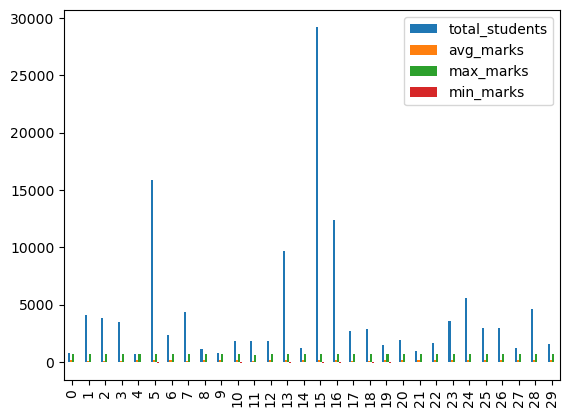

In [59]:
city_wise_data.plot(kind="bar")

In [60]:
# Filter the dataset for Tamil Nadu state
Tamil_df = ds[ds['state'] == 'TAMIL NADU']

# Display the filtered data
print(Tamil_df)

         dummy_srlno  marks       state         city  \
1624493   4101010001    262  TAMIL NADU      CHENNAI   
1624494   4101010002    240  TAMIL NADU      CHENNAI   
1624495   4101010003    251  TAMIL NADU      CHENNAI   
1624496   4101010004    423  TAMIL NADU      CHENNAI   
1624497   4101010005    183  TAMIL NADU      CHENNAI   
...              ...    ...         ...          ...   
1778190   4122060343     75  TAMIL NADU  KRISHNAGIRI   
1778191   4122060344    106  TAMIL NADU  KRISHNAGIRI   
1778192   4122060345    372  TAMIL NADU  KRISHNAGIRI   
1778193   4122060346    132  TAMIL NADU  KRISHNAGIRI   
1778194   4122060347     53  TAMIL NADU  KRISHNAGIRI   

                                            center_name  center_number  
1624493  SATHYABAMA INSTITUTE OF SCIENCE AND TECHNOLOGY         410101  
1624494  SATHYABAMA INSTITUTE OF SCIENCE AND TECHNOLOGY         410101  
1624495  SATHYABAMA INSTITUTE OF SCIENCE AND TECHNOLOGY         410101  
1624496  SATHYABAMA INSTITUTE OF SC

In [61]:
# Group by city
city_wise_data = Tamil_df.groupby('city').agg(
    total_students=('dummy_srlno', 'count'),
    avg_marks=('marks', 'mean'),
    max_marks=('marks', 'max'),
    min_marks=('marks', 'min')
).reset_index()

# Display the city-wise grouped data
print(city_wise_data)

                     city  total_students   avg_marks  max_marks  min_marks
0                ARIYALUR            2295  184.252288        696        -28
1              CHENGALPET            3056  187.361911        705        -13
2                 CHENNAI           23327  255.257384        720        -38
3              COIMBATORE            7127  250.505402        715        -25
4               CUDDALORE            4974  182.501005        700        -28
5              DHARMAPURI            5621  216.009251        715        -25
6                DINDIGUL            3276  207.568376        700        -38
7                   ERODE            4597  244.938656        715        -30
8             KANCHIPURAM            2147  181.659991        672        -25
9   KANYAKUMARI/NAGERCOIL            4980  192.802410        711        -16
10                  KARUR            1878  237.596912        710        -12
11            KRISHNAGIRI            5006  226.106472        700        -33
12          

<Axes: >

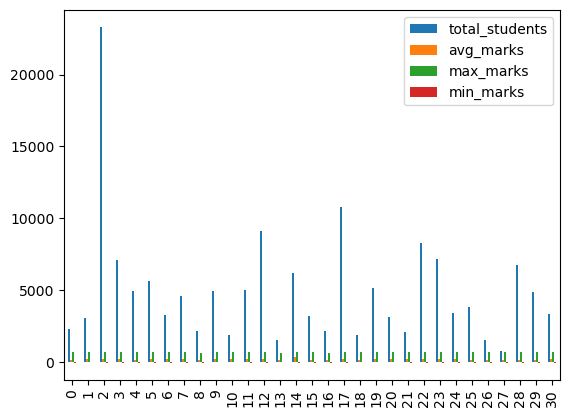

In [62]:
city_wise_data.plot(kind="bar")

# Group Data by City and Count Students

In [63]:
# Filter the dataset for students with 720 marks
top_scorers = ds[ds['marks'] == 720]
print("Students with 720 marks:")
print(top_scorers)

# Group the data by city and count the number of students
city_counts = top_scorers['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']
print("Count of students with 720 marks by city:")
print(city_counts)




Students with 720 marks:
         dummy_srlno  marks           state         city  \
12526     1203040201    720  ANDHRA PRADESH      NELLORE   
18807     1205011150    720  ANDHRA PRADESH   VIJAYAWADA   
19977     1205030130    720  ANDHRA PRADESH   VIJAYAWADA   
21178     1205040383    720  ANDHRA PRADESH   VIJAYAWADA   
126179    1504020621    720           BIHAR    MADHUBANI   
...              ...    ...             ...          ...   
2153287   4408010959    720   UTTAR PRADESH      LUCKNOW   
2201823   4502010321    720     UTTARAKHAND     HALDWANI   
2260373   4608060485    720     WEST BENGAL      KOLKATA   
2279106   4615020497    720     WEST BENGAL  MURSHIDABAD   
2314683   4609020058    720     WEST BENGAL     SILIGURI   

                                               center_name  center_number  
12526           PADMAVATHI VIDYALAYA SULLURPETA NELLORE AP         120304  
18807    POTTI SRIRAMULU CHALAVADI MALLIKARJUNA RAO COL...         120501  
19977                    K

In [64]:
# Select the top 10 cities based on the count
top10_cities = city_counts.head(10)
print("Top 10 cities with the highest number of students scoring 720 marks:")
print(top10_cities)


Top 10 cities with the highest number of students scoring 720 marks:
                         city  count
0                      JAIPUR      5
1                     CHENNAI      4
2                  VIJAYAWADA      3
3                       SIKAR      3
4                    NAMAKKAL      3
5                      NAGPUR      2
6  SAHIBZADA AJIT SINGH NAGAR      2
7                        KOTA      2
8            BENGALURU- URBAN      2
9                   AHMEDABAD      2


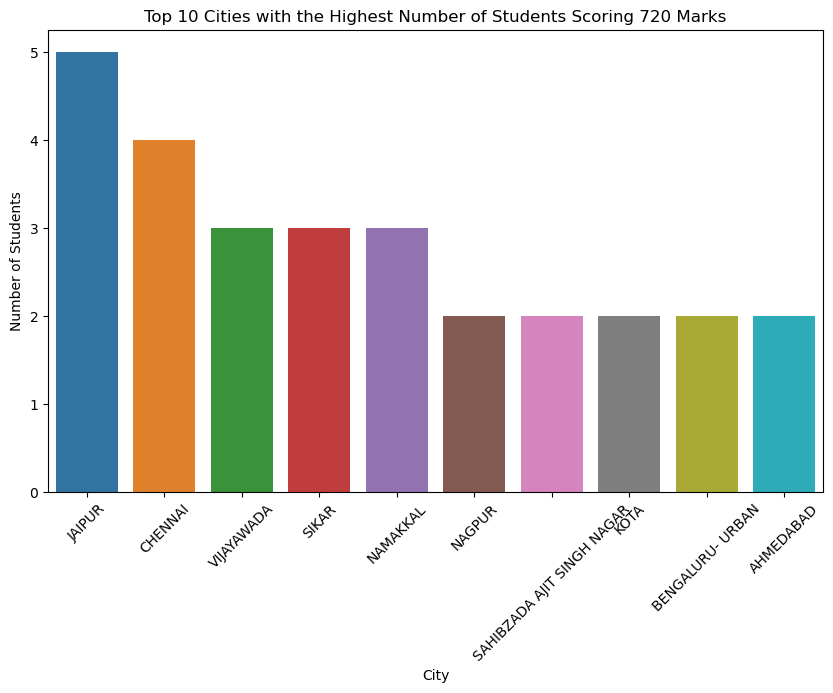

In [38]:
# Visualize the results using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_cities, x='city', y='count')
plt.title('Top 10 Cities with the Highest Number of Students Scoring 720 Marks')
plt.xlabel('City')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()


## Insights from the Bar Plot
- Top Performing Cities:

   - The bar plot shows the top 10 cities where the highest number of students achieved the perfect score of 720 marks.
   - This allows us to identify which cities are producing the most top-scoring students.
- Comparison of Cities:

   - The length of the bars represents the number of students who scored 720 marks in each city.
   - Cities with longer bars have more students scoring 720 marks, indicating higher performance.
- City-Specific Insights:

   - The specific cities leading in terms of the number of top scorers can be noted.
   - It helps in recognizing the educational strength or effectiveness of coaching centers in these cities.
- Educational Trends:

   - Such visualizations can highlight trends in education, such as which regions are excelling in producing top-performing students.
   - It can also indicate possible areas for further investment in educational resources.
- Strategic Focus for Improvement:

   - For cities with fewer top scorers, this insight can help educational authorities or institutions focus their efforts on improving performance.
   - They can analyze the methods used by top-performing cities and implement similar strategies.
- Visual Representation
   - Title: The title clearly states that the plot is about the top 10 cities with the highest number of students scoring 720 marks.
   - X-axis (City): This axis lists the cities. The cities are named and rotated to ensure readability.
   - Y-axis (Number of Students): This axis indicates the number of students scoring 720 marks in each city.
   - Bar Length: Represents the number of students in each city achieving the perfect score.
- Conclusion
  - The bar plot effectively visualizes which cities have the highest number of top-scoring students, allowing for easy comparison and identification of top-performing regions. This information is valuable for educators, policymakers, and institutions aiming to understand and replicate successful educational practices.

C:\Users\himan\OneDrive\Documents\Custom Office Templates\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


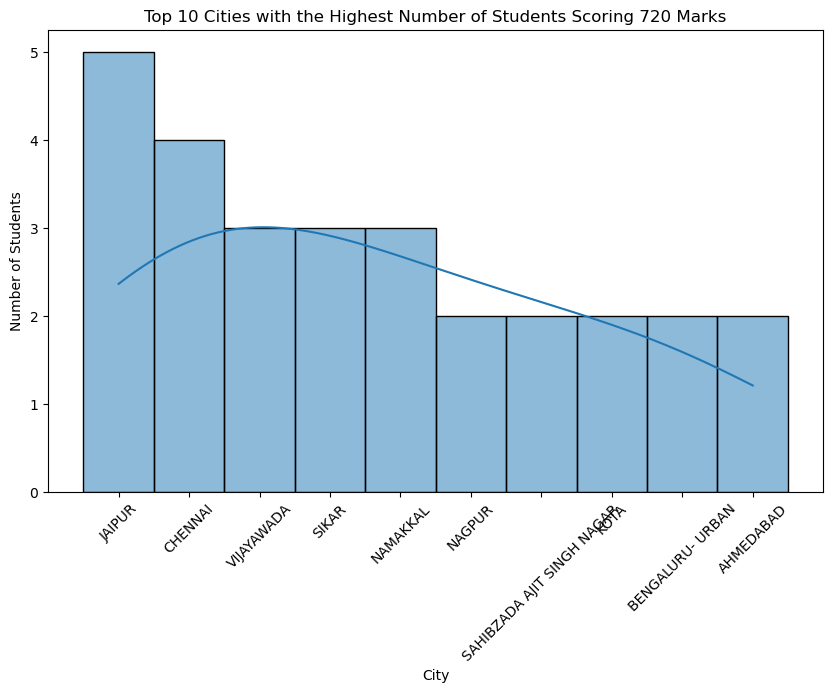

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=top10_cities, x='city', weights='count', kde=True)
plt.title('Top 10 Cities with the Highest Number of Students Scoring 720 Marks')
plt.xlabel('City')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

# Insights from Both Plots
- Bar Plot
   - Direct Comparison: The bar plot allows for a straightforward comparison of the number of students scoring 720 marks in each city.
   - Rank Ordering: It's easy to see the rank order of cities based on the number of top scorers.
   - Discrete Distribution: The bar plot emphasizes the discrete nature of the data.
- Histogram with KDE Plot
   - Distribution Shape: The histogram with KDE plot gives an idea of the distribution shape and density of the data.
   - Density Estimation: The KDE (Kernel Density Estimate) line provides a smoothed estimate of the data distribution, which can be helpful in identifying underlying patterns.
   - Continuous Insight: While the histogram retains the discrete counts, the KDE line introduces a continuous perspective, which might be less intuitive for strictly categorical data like city counts.